# **ASSIGNMENT 2 - DECISION TREES**

I have taken help through the following sources on the internet :


*   https://www.youtube.com/watch?v=74jW6UkDBig
*  https://towardsdatascience.com/decision-trees-for-classification-id3-algorithm-explained-89df76e72df1
 

## **Importing Libraries**










In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


## **Importing Datasets**

In [3]:
dtrain=pd.read_csv('train.csv')

In [4]:
print(dtrain.head())

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0            1         0       3    male  22.0      1      0   7.2500
1            2         1       1  female  38.0      1      0  71.2833
2            3         1       3  female  26.0      0      0   7.9250
3            4         1       1  female  35.0      1      0  53.1000
4            5         0       3    male  35.0      0      0   8.0500


In [5]:
dtest=pd.read_csv('test.csv')

In [6]:
print(dtest.head())

   PassengerId  Survived  Pclass   Sex   Age  SibSp  Parch     Fare
0          621         0       3  male  27.0      1      0  14.4542
1          622         1       1  male  42.0      1      0  52.5542
2          623         1       3  male  20.0      1      1  15.7417
3          624         0       3  male  21.0      0      0   7.8542
4          625         0       3  male  21.0      0      0  16.1000


In [7]:
dtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  620 non-null    int64  
 1   Survived     620 non-null    int64  
 2   Pclass       620 non-null    int64  
 3   Sex          620 non-null    object 
 4   Age          489 non-null    float64
 5   SibSp        620 non-null    int64  
 6   Parch        620 non-null    int64  
 7   Fare         620 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 38.9+ KB


## **Analysing relationships between the Surviveded label and features**

Idea taken from : https://www.youtube.com/watch?v=VCJdg7YBbAQ

In [8]:
dtrain['Survived'].value_counts()

0    376
1    244
Name: Survived, dtype: int64



*   Survived : 244
*   Not Survived : 376



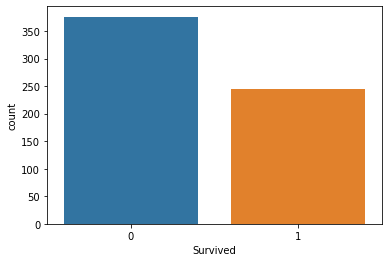

In [9]:
sn.countplot(x="Survived",data=dtrain)
plt.show()

### Survival Stats in different passenger classes 

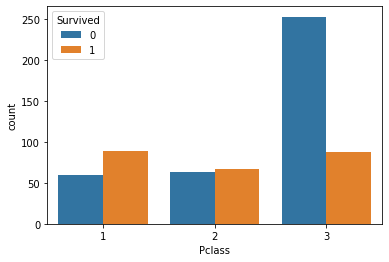

In [10]:
sn.countplot(x="Pclass",hue="Survived",data=dtrain)
plt.show()

### Histogram depicting different ages of people

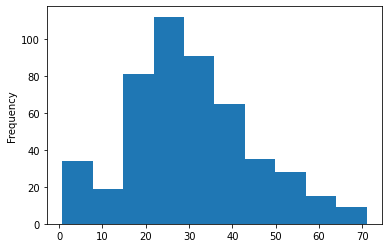

In [11]:
dtrain['Age'].plot.hist()
plt.show()

### Survival stats for male and female passengers

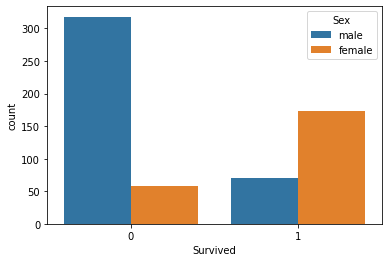

In [12]:
sn.countplot(x="Survived",hue="Sex",data=dtrain)
plt.show()

## **Data Wrangling**

In [23]:
dtest['Age'].fillna(dtest['Age'].mean(),inplace = True)

dtrain['Age'].fillna(dtrain['Age'].mean(),inplace = True)

In [14]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [15]:
x=dtrain.drop("Survived",axis=1)
x=dtrain.drop("PassengerId",axis=1)
y=dtrain["Survived"]



x1=dtest.drop("Survived",axis=1)
x1=dtest.drop("PassengerId",axis=1)
y1=dtest["Survived"]
print(x1.shape)
x1['Sex']=x1['Sex'].replace(['male','female'],[0,1])
x['Sex']=x['Sex'].replace(['male','female'],[0,1])
print(x.head())

(271, 7)
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    0  22.0      1      0   7.2500
1         1       1    1  38.0      1      0  71.2833
2         1       3    1  26.0      0      0   7.9250
3         1       1    1  35.0      1      0  53.1000
4         0       3    0  35.0      0      0   8.0500


In [51]:


print(x.shape)
print(x.isnull().values.any())
#x.dropna(inplace=True)
print(x.isnull().values.any())
y1.shape

(620, 7)
False
False


(271,)

In [25]:
dtrain.head()
dtrain['Sex']=dtrain['Sex'].replace(['male','female'],[0,1])
dtest['Sex']=dtest['Sex'].replace(['male','female'],[0,1])

## **Training & Testing our Model**

In [40]:

def entropy(feature):
    elements,counts = np.unique(feature,return_counts = True) 
    ent=0
    for i in range(len(elements)):                                                            
        ent += (-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts))    # Calculating entropy 
    return ent

def split(x_data,feats,threshold):
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)
    for ix in range(x_data.shape[0]):                                            #Splitting rows in feature according to threshold value
        val = x_data[feats].loc[ix]
        if val >=threshold:
            x_right = x_right.append(x_data.iloc[ix])
        else:
            x_left = x_left.append(x_data.iloc[ix])
    return x_right,x_left


def information_gain(x_data,feats,threshold):
    right,left = split(x_data,feats,threshold)
                                                                                #Calculating Information Gain
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -99999
    i_gain = entropy(x_data.Survived) - (l * entropy(left.Survived) + r*entropy(right.Survived))
    return i_gain


In [62]:
class DecisionTree:
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None                                             #Initialising the class
        self.feats = None
        self.threshold = None
        self.depth = depth
        self.max_depth = max_depth
        self.target = None
    def train(self,x_train):
        features = ['Pclass', 'Age', 'Parch', 'Sex','SibSp']             # Features present in our dataset
        info_gains = []
        for ix in features:
            i_gain = information_gain(x_train,ix,x_train[ix].mean())     #Calculating information gain of each feature and adding all values to a list
            info_gains.append(i_gain)
        self.feats = features[np.argmax(info_gains)]                     #Finding out the feature with maximum information gain
        self.threshold = x_train[self.feats].mean()                      #Calculating threshold value
        print("Splitting Tree",self.feats)
        data_right,data_left = split(x_train,self.feats,self.threshold)   #Splitting data
        data_right = data_right.reset_index(drop=True)                    #Reset the indexes
        data_left = data_left.reset_index(drop=True)
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:              #Base Case for recursion
            if x_train.Survived.mean() >= 0.5: 
                self.target = 1                                               #If Survived , we take value as 1 , else 0 .
            else:                                                                       
                self.target = 0
            return
        if self.depth >= self.max_depth:                                     #Base Case for recursion
            if x_train.Survived.mean() >= 0.5:
                self.target = 1
            else:
                self.target = 0
            return
        self.left = DecisionTree(self.depth+1,self.max_depth)                   #Recursively calling next step towards left node
        self.left.train(data_left)
        self.right = DecisionTree(self.depth+1,self.max_depth)                  #Recursively calling next step towards right node
        self.right.train(data_right)
        if x_train.Survived.mean() >= 0.5:
            self.target = 1
        else:
            self.target = 0
        
#Prediction


    def predict(self,test):                                                     
        if test[self.feats] > self.threshold:
            if self.right is None:
                return self.target
            return self.right.predict(test)
        if test[self.feats] < self.threshold:
            if self.left is None:
                return self.target
            return self.left.predict(test)

In [60]:
tree = DecisionTree()
tree.train(dtrain)

In [43]:


y_pred = []
for ix in range(dtest.shape[0]):
    y_pred.append(tree.predict(dtest.loc[ix]))
for i in range(len(y_pred)):
    if y_pred[i] == 0:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

## **Calculating Accuracy & F1 score**

In [54]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
#plt.scatter(x1,y1,'r')
#plt.scatter(x1,out,'b')
#plt.show()
print("The accuracy obtained after testing :" ,accuracy(y1,y_pred)*100)


The accuracy obtained after testing : 82.65682656826569


In [56]:
def compute(y1,y2):
  tneg=0          #true negative ( expected value = 0 and predicted value=0 )
  tpos=0          #true positive ( expected value = 1 and predicted value=1 )
  fpos=0          #false positive ( expected value = 0 and predicted value=1 )
  fneg=0          #false negative ( expected value = 1 and predicted value=0 )
  for i in range(271):
    
    if(y1[i]==0 and y2[i]==0):
      tneg+=1
    elif(y1[i]==0 and y2[i]==1):
      fpos+=1
    elif(y1[i]==1 and y2[i]==0):
      fneg+=1
    else:
      tpos+=1

  return tpos,tneg,fpos,fneg

def precision(true_positive,false_positive):
  return (true_positive*100)/(true_positive+false_positive)
def recall(true_positive,false_negative):
  return (true_positive*100)/(true_positive+false_negative)
def f1_score(precision,recall):
  return (2*(precision*recall))/(precision+recall)

In [58]:
#Finding out values
true_positive , true_negative , false_positive , false_negative = compute(y1,y_pred)[0] , compute(y1,y_pred)[1] , compute(y1,y_pred)[2] , compute(y1,y_pred)[3]
precision = precision(true_positive , false_positive)   #Calculating precision
recall=recall(true_positive,false_negative)           #Calculating recall
print("F1 Score is : ",f1_score(precision,recall))

F1 Score is :  72.18934911242603
